Dataset loaded successfully!
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 

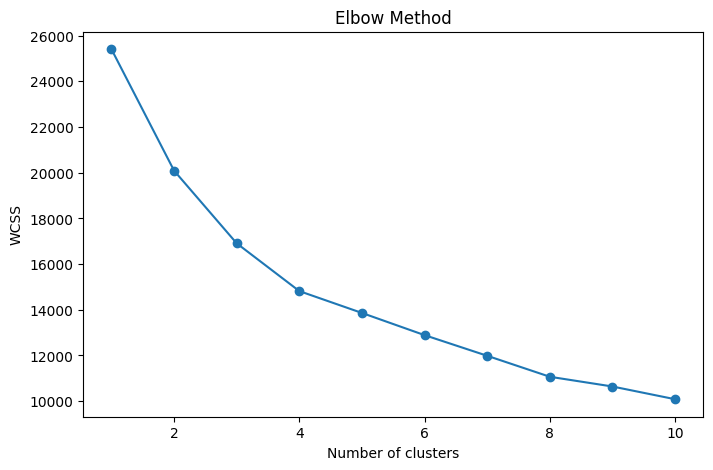


K-Means Clustering result:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...          NaN   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          NaN   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          NaN   
3   8/25/2003 0:00  Shipped       3         8     2003  ...          NaN   
4  10/10/2003 0:00  Shipped       4        10     2003  ...          NaN   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0          

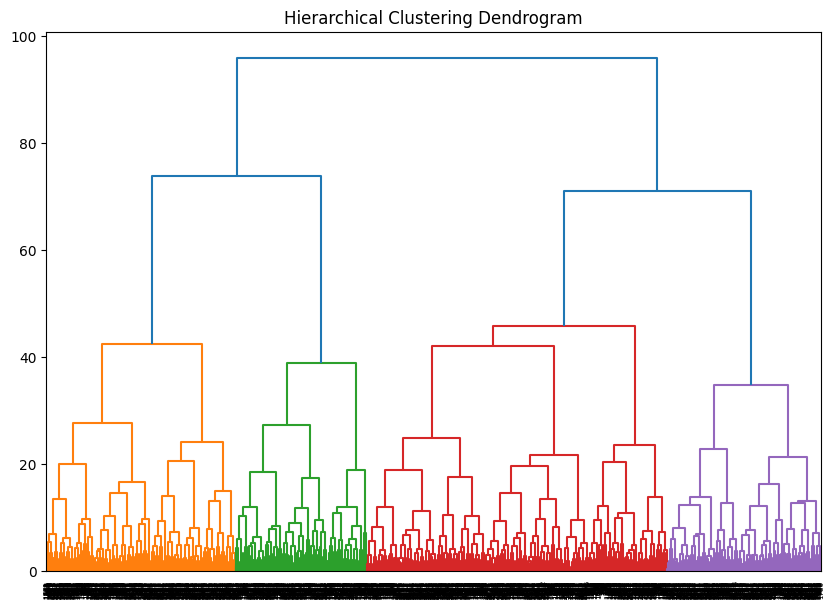


Hierarchical Clustering result:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...           CITY  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...            NYC   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          Reims   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          Paris   
3   8/25/2003 0:00  Shipped       3         8     2003  ...       Pasadena   
4  10/10/2003 0:00  Shipped       4        10     2003  ...  San Francisco   

   STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRS

In [5]:
# -------------------------
# Import libraries
# -------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# -------------------------
# 1. Load Dataset with correct encoding
# -------------------------
df = pd.read_csv("sales.csv", encoding='latin1')  # UnicodeDecodeError fix
print("Dataset loaded successfully!")
print(df.head())

# -------------------------
# 2. Select numeric columns for clustering
# -------------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]

# -------------------------
# 3. Standardize the data
# -------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# 4. Elbow Method to determine optimal K for K-Means
# -------------------------
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# -------------------------
# 5. K-Means Clustering
# -------------------------
k = 4  # choose based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
print("\nK-Means Clustering result:")
print(df.head())

# -------------------------
# 6. Hierarchical Clustering
# -------------------------
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Assign clusters (cut dendrogram at k clusters)
df['Hier_Cluster'] = fcluster(linked, k, criterion='maxclust')
print("\nHierarchical Clustering result:")
print(df.head())
